# Lab Notebook 20

In this notebook, we use a fully connected neural network to solve a previously seen problem in regression: the photometric redshift problem  We also explore the effect of loss function and learning rate schedule. 

*Modified from: Copyright: Viviana Acquaviva (2023). License: [BSD-3-clause](https://opensource.org/license/bsd-3-clause/)*

## Erin Bennett and Anthony Slawski

In [87]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras

from keras.models import Sequential #the model is built adding layers one after the other
from keras.layers import Dense #fully connected layers: every output talks to every input
from keras.layers import Dropout #for regularization

# Part 1: PhotoZ regression with a deep NN


## Step 1

Let us begin with the reduced (high-quality) data set we used for Bagging and Boosting methods. For reference, our best model achieved an outlier fraction of 4%.

Read in 'sel_features.csv' and 'sel_target.csv' as X and y, respectively. You will need to shuffle X and y (use random_state=12) as we did in the previous notebook.

In [104]:
X=pd.read_csv('sel_features.csv',sep='\t')
y=pd.read_csv('sel_target.csv',sep='\t')

X,y=shuffle(X,y,random_state=12)

Divide the data into fifths; we would like to use a 60/20/20 split for training/validation/test. Define these arrays.

In [105]:
print(X.shape)
X.head()

(6307, 6)


,u_apercor,g_apercor,r_apercor,i_apercor,z_apercor,y_apercor
4561,23.7774,23.4961,23.2445,22.9700,22.5860,22.4497
3675,23.7430,23.3638,22.6674,21.7934,21.2195,21.0882
3201,24.1826,23.1667,22.6836,22.4811,22.3890,22.4926
780,23.6480,23.2737,22.6016,22.3798,22.3236,22.3666
4205,24.0790,23.7875,23.3592,22.6754,22.4678,22.4220


In [106]:
print(y.shape)
y.head()

(6307, 1)


,zhelio
4561,1.3944
3675,0.9846
3201,0.1683
780,0.4280
4205,0.8421


In [107]:
X_train, X_val, X_test = X[:3784], X[3784:5046], X[5046:]
y_train, y_val, y_test = y[:3784], y[3784:5046], y[5046:]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((3784, 6), (1262, 6), (1261, 6), (3784, 1), (1262, 1), (1261, 1))

We know that we need to scale our data! Do so below:

In [108]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

## Step 2

In a regression problem, we will choose a different activation for the output layer (linear), and an appropriate loss function (MSE). Our input layer has **six neurons** for this problem. For other parameters and the network structure, we can start with two relu-activated layers with **100 neurons** and go from there.

1. Define your model using "Sequential()".
2. Define your optimizer using the Adam optimizer from keras, and use the default learning rate of 0.001.
3. Add an input layer and specify a size of 100 neurons (size=number of original features).
4. Add one hidden layer and specify 100 neurons.
5. Add an output layer with one neuron
6. Finally, compile your model using MSE as the loss.

In [109]:
model = keras.Sequential([
    Dense(100, activation='relu',input_dim=X_train.shape[1]),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

C:\Users\antho\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


To create your neural network, fit your model and use 100 epochs and batch size = 300:

In [110]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=300,
                    validation_data=(X_val, y_val))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5603 - val_loss: 0.2461
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2209 - val_loss: 0.1581
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1321 - val_loss: 0.0992
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0751 - val_loss: 0.0679
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503 - val_loss: 0.0581
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0412 - val_loss: 0.0555
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0449 - val_loss: 0.0550
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0464 - val_loss: 0.0548
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0422 - val_loss: 0.0541
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0405 - val_loss: 0.0539
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0380 - val_loss: 0.0537
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0283 - val_loss: 0.0450
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - val_loss: 0.0458
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0315 - val_loss: 0.0447
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - val_loss: 0.0438
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 - val_loss: 0.0450
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257 - val_loss: 0.0442
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - val_loss: 0.0440
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - val_loss: 0.0450
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0271 - val_loss: 0.0435
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245 - val_loss: 0.0447
Epoch 79/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0275 - val_loss: 0.0446
Epoch 80/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0303 

Use "model.evaluate" to find the MSE:

In [111]:
mse=model.evaluate(X_test,y_test)
print('Mean Squared Error:',mse)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0320
Mean Squared Error: 0.025199096649885178


## Step 3

As in the previous lab, we can plot the loss as a function of epoch from the train and validation data sets. Here the loss is of course the MSE.

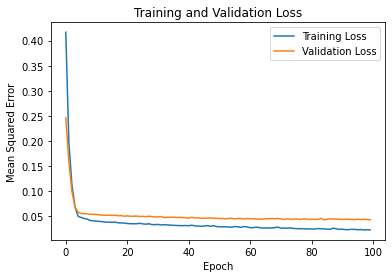

In [112]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

As always with regression problems, it is helpful to plot the predictions against the true values. Plot estimated redshift versus true redshift in a scatter plot below:

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


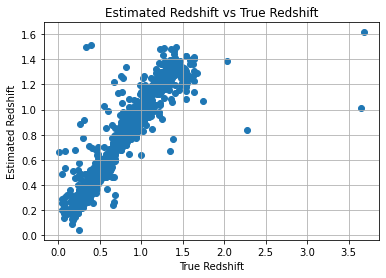

In [113]:
predictions=model.predict(X_test)

plt.scatter(y_test,predictions)
plt.title('Estimated Redshift vs True Redshift')
plt.xlabel('True Redshift')
plt.ylabel('Estimated Redshift')
plt.grid(True)

## Step 4

We didn't do cross validation, so we can only generate predictions on our single test fold in order to derive the other metrics we are interested in.

First, calculate the Outlier Fraction (OLF):

$\mathrm{OLF} = \mathrm{num}\left ( \frac{|\Delta z|}{1+z_{\mathrm{true}}} > 0.15 = \mathrm{true} \right)/N$

*The numerator is the number of instances where $\frac{|\Delta z|}{1+z_{\mathrm{true}}}>0.15$ is true. $N$ is the length of $y_{\mathrm{test}}$.*

We can also calculate the Normalized Median Absolute Deviation (NMAD):

$\sigma_{\mathrm{NMAD}}=1.48 \times \mathrm{median}\left ( \frac{|\Delta z|}{1+z_{\mathrm{true}}}\right )$

In [114]:
dz=np.abs(predictions.flatten()-y_test.values.flatten())
outliers=np.where(y_test.values.flatten()>0.15,1,0)

OLF=np.sum(dz[outliers==1]/(1+y_test.values.flatten()[outliers==1]))/len(y_test)

NMAD=1.48*np.median(dz[outliers==0]/(1+y_test.values.flatten()[outliers==0]))

print('Outlier Fraction:',OLF)
print('Normalized Median Absolute Deviation:',NMAD)

Outlier Fraction: 0.03954251389489335
Normalized Median Absolute Deviation: 0.24009333061117938


# Part 2: Effect of loss function

So far, we have used the MSE loss in our training, but this choice is not unique. Would using the MAE or MAPE loss functions give better results for the OLF and NMAD parameters?

In [115]:
model = keras.Sequential([
    Dense(100, activation='relu', input_dim=X_train.shape[1]),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=300,
                    validation_data=(X_val, y_val))
mse=model.evaluate(X_test,y_test)
predictions=model.predict(X_test)
dz=np.abs(predictions.flatten()-y_test.values.flatten())
outliers=np.where(y_test.values.flatten()>0.15,1,0)

OLF=np.sum(dz[outliers==1]/(1+y_test.values.flatten()[outliers==1]))/len(y_test)

NMAD=1.48*np.median(dz[outliers==0]/(1+y_test.values.flatten()[outliers==0]))

print('Outlier Fraction (OLF):',OLF)
print('Normalized Median Absolute Deviation:',NMAD)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5317 - val_loss: 0.3553
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3330 - val_loss: 0.2709
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2455 - val_loss: 0.1946
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1810 - val_loss: 0.1394
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1309 - val_loss: 0.1217
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1216 - val_loss: 0.1133
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1132 - val_loss: 0.1076
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1114 - val_loss: 0.1038
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1048 - val_loss: 0.1037
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0993 - val_loss: 0.0989
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0942 - val_loss: 0.0968
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - val_loss: 0.0683
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0692 - val_loss: 0.0680
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0716 - val_loss: 0.0678
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0657 - val_loss: 0.0680
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0660 - val_loss: 0.0677
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0681 - val_loss: 0.0666
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0636 - val_loss: 0.0666
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0655 - val_loss: 0.0663
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0660 - val_loss: 0.0663
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0693 - val_loss: 0.0661
Epoch 79/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0698 - val_loss: 0.0679
Epoch 80/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0676 

In [117]:
model = keras.Sequential([
    Dense(100, activation='relu', input_dim=X_train.shape[1]),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_percentage_error')
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=300,
                    validation_data=(X_val, y_val))
mse=model.evaluate(X_test,y_test)
predictions=model.predict(X_test)
dz=np.abs(predictions.flatten()-y_test.values.flatten())
outliers=np.where(y_test.values.flatten()>0.15,1,0)

OLF=np.sum(dz[outliers==1]/(1+y_test.values.flatten()[outliers==1]))/len(y_test)

NMAD=1.48*np.median(dz[outliers==0]/(1+y_test.values.flatten()[outliers==0]))

print('Outlier Fraction:',OLF)
print('Normalized Median Absolute Deviation:',NMAD)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 69.9803 - val_loss: 531.5189
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.8677 - val_loss: 463.0758
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.8970 - val_loss: 460.9753
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.1942 - val_loss: 483.3430
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.4708 - val_loss: 481.4482
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.2352 - val_loss: 467.6776
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.8420 - val_loss: 470.6018
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.1062 - val_loss: 452.4502
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.6002 - val_loss: 469.2986
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.2498 - val_loss: 492.0035
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.7553 - val_loss: 493.1736
Epoch 12/100
13/13 ━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6500 - val_loss: 547.6217
Epoch 68/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1981 - val_loss: 549.1443
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1230 - val_loss: 541.0747
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1484 - val_loss: 535.8433
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6044 - val_loss: 526.2236
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.4632 - val_loss: 553.9990
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1790 - val_loss: 552.7339
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1949 - val_loss: 538.6310
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2613 - val_loss: 538.0098
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2216 - val_loss: 544.4111
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5659 - val_loss: 594.0215
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s

### MAPE loss gives the better overall results for the OLF and NMAD parameters

# Part 3: Effect of learning rate schedules

When training a neural network, we can tune the performance by optimizing a large set of hyperparameters. Last time, we looked at the choice of optimizer and regularization. Another important parameter is the learning rate. A learning rate that is set too small will slow down the training, as we update the weights of the network in tiny steps. On the other hand, if the learning rate is set too high, the training can diverge. Usually we want to start with a large learning rate to make fast progress and then slow down the training close to the optimum. This can be achieved by using learning rate schedules, which we will investigate in this exercise.

## Step 1: Time based-decay

First we can try a time-based decay:
$$\eta(t)=\eta_0/(1+t⋅\eta_0/n_{epochs})$$

where $\eta_0$ is the initial learning rate, $t$ the iteration number (epoch) and $n_{epochs}$ the total number of epochs. 

Write a function (i.e the learning schedule) that implements this learning schedule. The function takes an epoch index (integer, indexed from 0) and current learning rate (float) as inputs and returns a new learning rate as output (float). In our case, the current learning rate is not actually used in the function, but this format is expected when we use it in keras later. Set the initial learning rate to 0.001 and the number of epochs to 100. Make a plot of the learning rate as a function of epochs.

In [118]:
def time_based_decay(epoch, cur_lr):
    init_lr = 0.001
    epochs = 100
    decay_rate = init_lr / epochs
    new_lr = init_lr / (1 + epoch * decay_rate)
    return new_lr

Text(0, 0.5, 'Learning Rate')

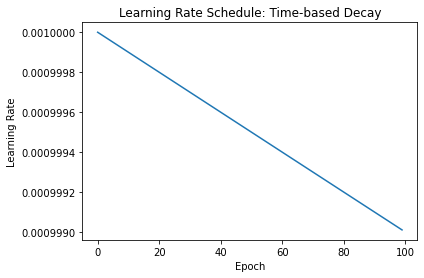

In [119]:
epochs=range(100)
learning_rates=[time_based_decay(epoch, 0) for epoch in epochs]
plt.plot(epochs,learning_rates)
plt.title('Learning Rate Schedule: Time-based Decay')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

Train the model with this new learning rate schedule, and save the history. Remember to rebuild the model to re-initialize all weights and biases. To use the learning rate schedule, add **callbacks=[keras.callbacks.LearningRateScheduler(my_function, verbose=1)]** to model.fit()

In [120]:
model = keras.Sequential([
    Dense(100, activation='relu',input_dim=X_train.shape[1]),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
lr_schedule = keras.callbacks.LearningRateScheduler(time_based_decay, verbose=1)

history_t = model.fit(X_train,
                                y_train, epochs=100, 
                                batch_size=300, 
                                validation_data=(X_val, y_val), 
                                callbacks=[lr_schedule])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4148 - val_loss: 0.2563 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999900000999989.
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2079 - val_loss: 0.1362 - learning_rate: 9.9999e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999980000399992.
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1078 - val_loss: 0.0779 - learning_rate: 9.9998e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.000999970000899973.
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0591 - val_loss: 0.0614 - learning_rate: 9.9997e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.000999960001599936.
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0481 - val_loss: 0.0559 - learning_rate: 9.9996e-04

Epoch 6: LearningRateScheduler setting learning rate to 

Epoch 37/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282 - val_loss: 0.0469 - learning_rate: 9.9964e-04

Epoch 38: LearningRateScheduler setting learning rate to 0.0009996301368493659.
Epoch 38/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - val_loss: 0.0479 - learning_rate: 9.9963e-04

Epoch 39: LearningRateScheduler setting learning rate to 0.0009996201443451488.
Epoch 39/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349 - val_loss: 0.0487 - learning_rate: 9.9962e-04

Epoch 40: LearningRateScheduler setting learning rate to 0.0009996101520407042.
Epoch 40/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - val_loss: 0.0471 - learning_rate: 9.9961e-04

Epoch 41: LearningRateScheduler setting learning rate to 0.0009996001599360256.
Epoch 41/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0338 - val_loss: 0.0469 - learning_rate: 9.9960e-04

Epoch 42: LearningRateScheduler setting learning rate to 0.0009995901680311073.
Epoch 42/100
13/13 ━━━━━━

Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - val_loss: 0.0489 - learning_rate: 9.9928e-04

Epoch 74: LearningRateScheduler setting learning rate to 0.0009992705325112669.
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - val_loss: 0.0455 - learning_rate: 9.9927e-04

Epoch 75: LearningRateScheduler setting learning rate to 0.0009992605471950758.
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - val_loss: 0.0448 - learning_rate: 9.9926e-04

Epoch 76: LearningRateScheduler setting learning rate to 0.0009992505620784412.
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - val_loss: 0.0452 - learning_rate: 9.9925e-04

Epoch 77: LearningRateScheduler setting learning rate to 0.0009992405771613573.
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - val_loss: 0.0452 - learning_rate: 9.9924e-04

Epoch 78: LearningRateScheduler setting learning rate to 0.0009992305924438184.
Epoch 78/100
13/13 ━━━━━━

## Step 2: Exponential decay

Repeat Part 3 Step 1 for a different learning schedule that uses exponential decay,

$$ \eta(t)=\eta_0⋅e^{−k⋅t},$$

where $k$ is the decay rate. We can try k=0.01.

In [121]:
def exponential_decay(epoch, lr):
    initial_lr = 0.001
    k = 0.01
    new_lr = initial_lr * np.exp(-k * epoch)
    return new_lr

epochs=np.arange(100)
lr=0.001
learning_rates = [exponential_decay(epoch, lr) for epoch in epochs]

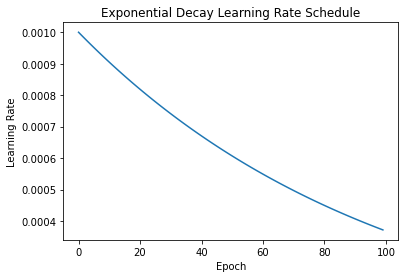

In [122]:
plt.plot(epochs, learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Decay Learning Rate Schedule')
plt.show()

In [123]:
model = keras.Sequential([
    Dense(100, activation='relu', input_dim=X_train.shape[1]),
    Dense(100, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
lr_schedule = keras.callbacks.LearningRateScheduler(exponential_decay, verbose=1)

history_exp = model.fit(X_train,
                                y_train, epochs=100, 
                                batch_size=300, 
                                validation_data=(X_val, y_val), 
                                callbacks=[lr_schedule])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100


C:\Users\antho\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.4306 - val_loss: 0.2464 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.000990049833749168.
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1914 - val_loss: 0.1202 - learning_rate: 9.9005e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009801986733067552.
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0921 - val_loss: 0.0782 - learning_rate: 9.8020e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009704455335485082.
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0697 - val_loss: 0.0607 - learning_rate: 9.7045e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0009607894391523232.
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0441 - val_loss: 0.0562 - learning_rate: 9.6079e-04

Epoch 6: LearningRateScheduler setting learning rate to 0.000951229424500714.
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

Epoch 37/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0371 - val_loss: 0.0470 - learning_rate: 6.9768e-04

Epoch 38: LearningRateScheduler setting learning rate to 0.0006907343306373547.
Epoch 38/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0319 - val_loss: 0.0470 - learning_rate: 6.9073e-04

Epoch 39: LearningRateScheduler setting learning rate to 0.0006838614092123559.
Epoch 39/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0292 - val_loss: 0.0466 - learning_rate: 6.8386e-04

Epoch 40: LearningRateScheduler setting learning rate to 0.0006770568744981646.
Epoch 40/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0319 - val_loss: 0.0476 - learning_rate: 6.7706e-04

Epoch 41: LearningRateScheduler setting learning rate to 0.0006703200460356394.
Epoch 41/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0297 - val_loss: 0.0466 - learning_rate: 6.7032e-04

Epoch 42: LearningRateScheduler setting learning rate to 0.0006636502501363194.
Epoch 42/100
13/13 ━━━━━━

Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 - val_loss: 0.0456 - learning_rate: 4.8675e-04

Epoch 74: LearningRateScheduler setting learning rate to 0.00048190899009020245.
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252 - val_loss: 0.0450 - learning_rate: 4.8191e-04

Epoch 75: LearningRateScheduler setting learning rate to 0.0004771139155210344.
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0250 - val_loss: 0.0446 - learning_rate: 4.7711e-04

Epoch 76: LearningRateScheduler setting learning rate to 0.0004723665527410147.
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0253 - val_loss: 0.0447 - learning_rate: 4.7237e-04

Epoch 77: LearningRateScheduler setting learning rate to 0.00046766642700990925.
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - val_loss: 0.0447 - learning_rate: 4.6767e-04

Epoch 78: LearningRateScheduler setting learning rate to 0.00046301306831122806.
Epoch 78/100
13/13 ━━━

## Step 3: 

Graph the loss for the three learning schedules we have (constant, time decay, exponential decay). Zoom in on the values at the end of the training to better see the differences.

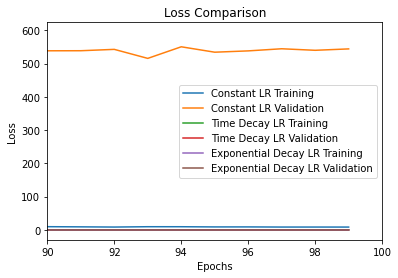

In [124]:
plt.plot(history.history['loss'],label='Constant LR Training')
plt.plot(history.history['val_loss'],label='Constant LR Validation')
plt.plot(history_t.history['loss'], label='Time Decay LR Training')
plt.plot(history_t.history['val_loss'], label='Time Decay LR Validation')
plt.plot(history_exp.history['loss'], label='Exponential Decay LR Training')
plt.plot(history_exp.history['val_loss'], label='Exponential Decay LR Validation')

plt.xlim(90,100)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

# Part 4: A first convolutional neural network

In the following, we try to improve on our dense NN for the MNIST image dataset with a deep convolutional network. There are two new kinds of layers that will be used, **Conv2D** and **MaxPool2D**. We will discuss this in detail next week, but for now just look at the code. While the code runs, try to figure out the structure of the network. You might want to look up these layers in the keras documentation.

In [125]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train, x_val, y_train, y_val = train_test_split(
	x_train, y_train, test_size = 1/6, random_state=42)

print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_val.shape =', x_val.shape)
print('y_val.shape =', y_val.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (50000, 28, 28, 1)
y_train.shape = (50000,)
x_val.shape = (10000, 28, 28, 1)
y_val.shape = (10000,)
x_test.shape = (10000, 28, 28, 1)
y_test.shape = (10000,)


In [126]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

def make_conv_model():
  model = Sequential()

  model.add(Conv2D(filters = 10, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', input_shape = (28,28,1)))
  model.add(Conv2D(filters = 10, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation = "softmax"))
  optimizer = keras.optimizers.Adam()

  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
  return model

def make_dense_model():
  model = Sequential()
  model.add(Flatten(input_shape = (28,28,1)))
  model.add(Dense(512, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation = "softmax"))
  optimizer = keras.optimizers.Adam()

  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
  return model

simple_conv_model = make_conv_model()
dense_model = make_dense_model()
simple_conv_model.summary()
dense_model.summary()

C:\Users\antho\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\antho\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 10)     │         2,510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 64)             │       125,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,924 (503.61 KB)

 Trainable params: 128,924 (503.61 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
epochs = 40
batch_size = 86

simple_conv_history = simple_conv_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1)
dense_history = dense_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),verbose=1)

Epoch 1/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8440 - loss: 0.5171 - val_accuracy: 0.9788 - val_loss: 0.0725
Epoch 2/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9721 - loss: 0.0922 - val_accuracy: 0.9820 - val_loss: 0.0542
Epoch 3/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9806 - loss: 0.0620 - val_accuracy: 0.9857 - val_loss: 0.0481
Epoch 4/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9852 - loss: 0.0478 - val_accuracy: 0.9883 - val_loss: 0.0403
Epoch 5/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9864 - loss: 0.0425 - val_accuracy: 0.9888 - val_loss: 0.0383
Epoch 6/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9896 - loss: 0.0325 - val_accuracy: 0.9887 - val_loss: 0.0390
Epoch 7/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9907 - loss: 0.0302 - val_accuracy: 0.9876 - val_loss: 0.0447
Epoch 8/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9912 - loss: 0.0266 - 

Epoch 11/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9913 - loss: 0.0250 - val_accuracy: 0.9822 - val_loss: 0.0708
Epoch 12/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9920 - loss: 0.0242 - val_accuracy: 0.9814 - val_loss: 0.0789
Epoch 13/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.9843 - val_loss: 0.0677
Epoch 14/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9930 - loss: 0.0217 - val_accuracy: 0.9837 - val_loss: 0.0724
Epoch 15/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9929 - loss: 0.0198 - val_accuracy: 0.9815 - val_loss: 0.0923
Epoch 16/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9819 - val_loss: 0.0851
Epoch 17/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9940 - loss: 0.0154 - val_accuracy: 0.9831 - val_loss: 0.0893
Epoch 18/40
582/582 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9940 - loss: 0.0171 - val_a

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9869 - loss: 0.0672
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.1161


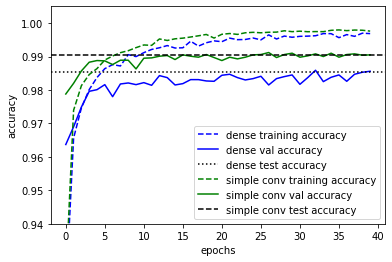

In [128]:
simple_conv_test_loss, simple_conv_test_acc = simple_conv_model.evaluate(x_test, y_test)
dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test)

plt.plot(dense_history.history["accuracy"], "b--",label="dense training accuracy")
plt.plot(dense_history.history["val_accuracy"], "b-",label="dense val accuracy")
plt.axhline(dense_test_acc, color="k", linestyle=":", label="dense test accuracy")
plt.plot(simple_conv_history.history["accuracy"], "g--",label="simple conv training accuracy")
plt.plot(simple_conv_history.history["val_accuracy"], "g-",label="simple conv val accuracy")
plt.axhline(simple_conv_test_acc,color="k", linestyle="--", label="simple conv test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.94, 1.005)
plt.legend()